# HW6 #

In [12]:
air='/Users/liang/Documents/統計數學與運算/images'

# 機械手臂 #

In [13]:
def randsphere(center, radius, n_per_sphere):
    '''
    generate random numbers in a n-dimensional sphere 
    i.e. in 2D, it is in a circle; in 3D, it is in a ball
    '''  
    r=radius
    ndim=center.size
    np.random.seed(42)
    x=np.random.normal(size=(n_per_sphere,ndim))#標準常態分佈
    ssq=np.sum(x**2,axis=1)
    fr=r*gammainc(ndim/2,ssq/2)**(1/ndim)\
        /np.sqrt(ssq)
    frtiled=np.tile(fr.reshape(n_per_sphere,1),(1,ndim))
    p=center+np.multiply(x,frtiled)
    return p

NameError: name 'air' is not defined

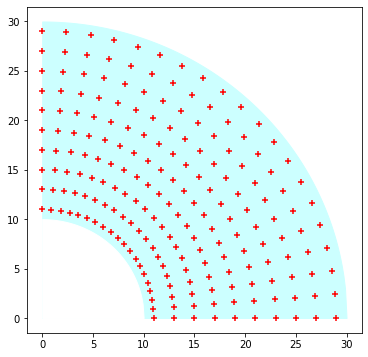

In [11]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# Preaper training data (input)
l1, l2 = 20, 10
f1=lambda x:np.sqrt((l1+l2)**2-x**2)
f2=lambda x:np.sqrt(l2**2-x**2)

plt.figure(figsize=(6,6))
x=np.linspace(0,l1+l2,200)
plt.fill_between(x,f1(x),0,color="#CCFFFF")
x=np.linspace(0,l2,100)
plt.fill_between(x,f2(x),0,color="white")

t = np.linspace(0, np.pi/2, 20)
l = np.arange(l1 - l2 + 1, l1 + l2 + 1, 2)
X = l.reshape(-1,1) @ np.cos(t.reshape(1,-1))
Y = l.reshape(-1,1) @ np.sin(t.reshape(1,-1))
plt.scatter(X.ravel(),Y.ravel(),marker='+',color='r')
# plt.savefig(air+'/twomcarmscatter.pdf',format='pdf')
plt.show()


機器手臂在不同神經元個數的訓練結果（樣本不均勻）

Root Mean square error is 0.0495


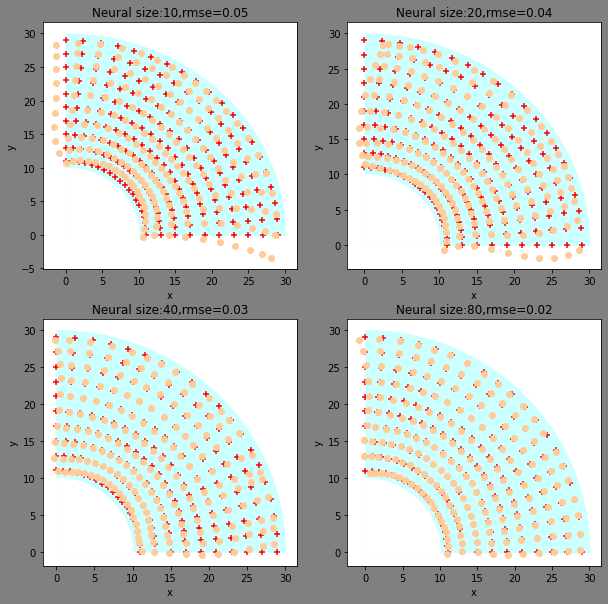

In [32]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# Preaper training data (input)
l1, l2 = 20, 10
f1=lambda x:np.sqrt((l1+l2)**2-x**2)
f2=lambda x:np.sqrt(l2**2-x**2)
fig,ax=plt.subplots(2,2,figsize=(10,10))

x=np.linspace(0,l1+l2,200)
ax[0][0].fill_between(x,f1(x),0,color="#CCFFFF"),ax[0][1].fill_between(x,f1(x),0,color="#CCFFFF"),ax[1][0].fill_between(x,f1(x),0,color="#CCFFFF"),ax[1][1].fill_between(x,f1(x),0,color="#CCFFFF")
x=np.linspace(0,l2,100)
ax[0][0].fill_between(x,f2(x),0,color="white"),ax[0][1].fill_between(x,f2(x),0,color="white"),ax[1][0].fill_between(x,f2(x),0,color="white"),ax[1][1].fill_between(x,f2(x),0,color="white")

t = np.linspace(0, np.pi/2, 20)
l = np.arange(l1 - l2 + 1, l1 + l2 + 1, 2)
X = l.reshape(-1,1) @ np.cos(t.reshape(1,-1))
Y = l.reshape(-1,1) @ np.sin(t.reshape(1,-1))

ax[0][0].scatter(X.ravel(),Y.ravel(),marker='+',color='r'),ax[0][1].scatter(X.ravel(),Y.ravel(),marker='+',color='r'),ax[1][0].scatter(X.ravel(),Y.ravel(),marker='+',color='r'),ax[1][1].scatter(X.ravel(),Y.ravel(),marker='+',color='r')
# prepare training data (output)
theta2 = np.arccos((X.ravel()**2 + Y.ravel()**2 -\
        l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(Y.ravel()/X.ravel()) - \
        np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))
# setup for ANN training
InputX = np.c_[X.ravel(), Y.ravel()] 
OutputY = np.c_[theta1, theta2] 
#-------------學習器的設定------------------------
hidden_layers1 = (10, )
hidden_layers2 = (20, )
hidden_layers3 = (40, )
hidden_layers4 = (80, )
solver = 'lbfgs' # the best for robot data 
# solver = ’sgd’
# solver = ’adam’
mlp_reg1 = MLPRegressor(max_iter = 80000, solver = solver, hidden_layer_sizes = hidden_layers1, verbose = False, activation = 'logistic', # default activation = ’relu’ 
tol=1e-6, random_state = 0)#遞迴到80000次就停止,solver代表演算法,verbose代表是否要列印出演算法的過程
mlp_reg2 = MLPRegressor(max_iter = 80000, solver = solver, hidden_layer_sizes = hidden_layers2, verbose = False, activation = 'logistic',tol=1e-6, random_state = 0)
mlp_reg3 = MLPRegressor(max_iter = 80000, solver = solver, hidden_layer_sizes = hidden_layers3, verbose = False, activation = 'logistic',tol=1e-6, random_state = 0)
mlp_reg4 = MLPRegressor(max_iter = 80000, solver = solver, hidden_layer_sizes = hidden_layers4, verbose = False, activation = 'logistic',tol=1e-6, random_state = 0)
#-----------------------------------------------
mlp_reg1.fit(InputX, OutputY) ,mlp_reg2.fit(InputX, OutputY),mlp_reg3.fit(InputX, OutputY) ,mlp_reg4.fit(InputX, OutputY)  
OutputY_hat1 = mlp_reg1.predict(InputX)
OutputY_hat2 = mlp_reg2.predict(InputX)
OutputY_hat3 = mlp_reg3.predict(InputX)
OutputY_hat4 = mlp_reg4.predict(InputX)
theta1_hat1, theta2_hat1 = OutputY_hat1[:,0], OutputY_hat1[:,1]
theta1_hat2, theta2_hat2 = OutputY_hat2[:,0], OutputY_hat2[:,1]
theta1_hat3, theta2_hat3 = OutputY_hat3[:,0], OutputY_hat3[:,1]
theta1_hat4, theta2_hat4 = OutputY_hat4[:,0], OutputY_hat4[:,1]
# convert to (x,y) positions
x_hat1 = l1 * np.cos(theta1_hat1) + l2 * np.cos(theta1_hat1+theta2_hat1)
y_hat1 = l1 * np.sin(theta1_hat1) + l2 * np.sin(theta1_hat1+theta2_hat1)
x_hat2 = l1 * np.cos(theta1_hat2) + l2 * np.cos(theta1_hat2+theta2_hat2)
y_hat2 = l1 * np.sin(theta1_hat2) + l2 * np.sin(theta1_hat2+theta2_hat2)
x_hat3 = l1 * np.cos(theta1_hat3) + l2 * np.cos(theta1_hat3+theta2_hat3)
y_hat3 = l1 * np.sin(theta1_hat3) + l2 * np.sin(theta1_hat3+theta2_hat3)
x_hat4 = l1 * np.cos(theta1_hat4) + l2 * np.cos(theta1_hat4+theta2_hat4)
y_hat4 = l1 * np.sin(theta1_hat4) + l2 * np.sin(theta1_hat4+theta2_hat4)
#print(mlp_reg.get_params)
# R_square=mlp_reg1.score(InputX,OutputY)
# print('R square={:.4f}'.format(R_square))
# mse=np.mean((OutputY-OutputY_hat)**2)
rmse1 = np.sqrt(mean_squared_error(OutputY, OutputY_hat1))
rmse2 = np.sqrt(mean_squared_error(OutputY, OutputY_hat2))
rmse3 = np.sqrt(mean_squared_error(OutputY, OutputY_hat3))
rmse4 = np.sqrt(mean_squared_error(OutputY, OutputY_hat4))
print('Root Mean square error is {:.4f}'.format(rmse1))   
# LossFun=mlp_reg1.loss_
# print('The Loss function is {:.4f}'.format(LossFun))
# print("Number of iterations :{}".format(mlp_reg1.n_iter_))
#show the predicted data with the training data
ax[0][0].scatter(x_hat1,y_hat1,marker='o',color='#FFCC99'),ax[0][1].scatter(x_hat2,y_hat2,marker='o',color='#FFCC99'),ax[1][0].scatter(x_hat3,y_hat3,marker='o',color='#FFCC99'),ax[1][1].scatter(x_hat4,y_hat4,marker='o',color='#FFCC99')
ax[0][0].set_xlabel('x')
ax[0][0].set_ylabel('y')
ax[0][1].set_xlabel('x')
ax[0][1].set_ylabel('y')
ax[1][0].set_xlabel('x')
ax[1][0].set_ylabel('y')
ax[1][1].set_xlabel('x')
ax[1][1].set_ylabel('y')
ax[0,0].set_title('Neural size:10,rmse={:.2f}'.format(rmse1))
ax[0,1].set_title('Neural size:20,rmse={:.2f}'.format(rmse2))
ax[1,0].set_title('Neural size:40,rmse={:.2f}'.format(rmse3))
ax[1,1].set_title('Neural size:80,rmse={:.2f}'.format(rmse4))
fig.set_facecolor('gray')
plt.savefig(air+'/hw6diffsampleununi.pdf',format='pdf')
plt.show()


在一圓形裡生產亂數

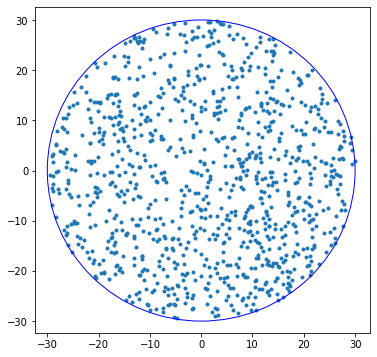

In [23]:
import numpy as np
from scipy.special import gammainc
import matplotlib.pyplot as plt
def randsphere(center, radius, n_per_sphere):
    '''
    generate random numbers in a n-dimensional sphere 
    i.e. in 2D, it is in a circle; in 3D, it is in a ball
    '''  
    r=radius
    ndim=center.size
    x=np.random.normal(size=(n_per_sphere,ndim))#標準常態分佈
    ssq=np.sum(x**2,axis=1)
    fr=r*gammainc(ndim/2,ssq/2)**(1/ndim)\
        /np.sqrt(ssq)
    frtiled=np.tile(fr.reshape(n_per_sphere,1),(1,ndim))
    p=center+np.multiply(x,frtiled)
    return p
radius_in,radius_out=10,30
p=randsphere(np.array([0,0]),30,1000)
# p=p[(p[:,0]>0)&(p[:,1]>0),:]#第一象限
d=np.sum(p**2,axis=1)
# p=p[d>=radius_in**2,:]
fig=plt.figure(figsize=(6,6))
ax = fig.gca()
ax.scatter(p[:,0],p[:,1],marker='.',label = 'Training Data')

ax.add_artist(plt.Circle(np.array([0,0]), radius_out,
        fill=False, color='blue'))  
# plt.figure(figsize=(6,6))
# plt.scatter(p[:,0],p[:,1],marker='.')
plt.savefig(air+"/hw6unicircle.pdf",format='pdf')
plt.show()



再把圓形裡面的點拿去訓練\測試

Trainer(TrainBFGS)
Epoch: 100; Error: 0.09149680317462842;
Epoch: 200; Error: 0.029415413179942305;
Epoch: 300; Error: 0.013325837684102192;
The goal of learning is reached
Mean Square Error in training:0.000058
Sum Square Error in training:0.009986
Sum Square Error in testing:0.034426


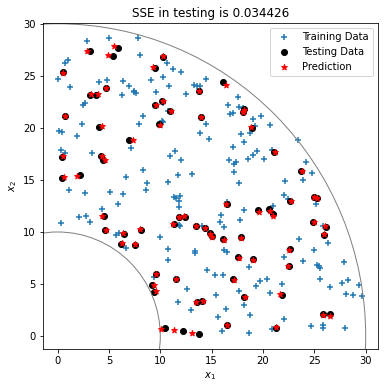

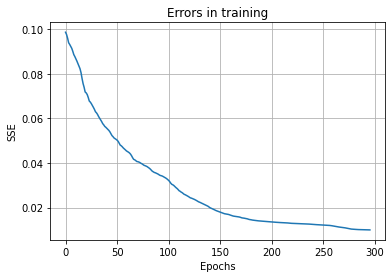

In [3]:
import neurolab as nl
from sklearn.model_selection import train_test_split
l1,l2=20,10
n=1000
#data distributed randomly in circle
center=np.array([0,0])
radius_in,radius_out=10,30
x1, x2 = p[:,0], p[:,1]
x_train, x_test, y_train, y_test = \
    train_test_split(x1, x2, test_size = 0.3)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
# --------------------------------------------------
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
ax.scatter(x_train, y_train, marker='+',  label = 'Training Data')
ax.scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
ax.add_artist(plt.Circle(center, radius_out,
        fill=False, color='0.5'))
ax.add_artist(plt.Circle(center, radius_in,
        fill=False, color='0.5'))        
# --------------------------------------------------
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [20, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]], 
    size = hidden_output_layers, transf = transf)
#change traning func, the default training function for rrgression is train_bfgs
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, \
    goal = 0.01) # show := print period, the return is an error function 
# predicted output for training data
OutputY_hat = net.sim(InputX) 
# theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]
# predicted output for testing data
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]

x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax.scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')

mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
print("Mean Square Error in training:{:.6f}".format(mse(OutputY, OutputY_hat)))
print("Sum Square Error in training:{:.6f}".format(sse(OutputY, OutputY_hat)))
print("Sum Square Error in testing:{:.6f}".format(sse_test))
plt.title('SSE in testing is {:.6f}'.format(sse_test))
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()
# plt.plot(err) # plot training error function: SSE
err = np.reshape(err, (-1, 1))
plt.plot(err[err < 0.1])
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.grid(True)
plt.title('Errors in training')
plt.show()

# Tesk2 均勻的樣本 #

不同樣本數下的圓

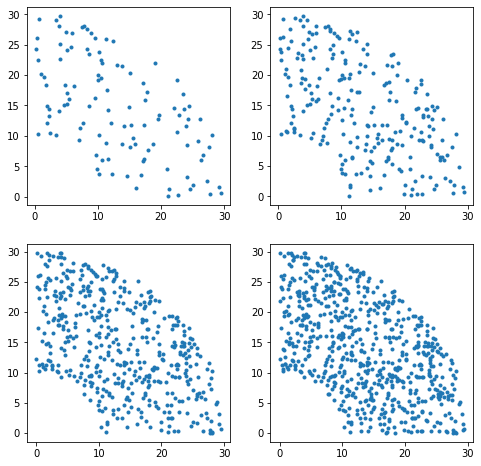

In [9]:
import numpy as np
from scipy.special import gammainc
import matplotlib.pyplot as plt
radius_in=10
radius_out=30
samplesize=[500,1000,2000,3000]
fig,ax=plt.subplots(2,2,figsize=(8,8))
p1=randsphere(np.array([0,0]),30,samplesize[0])
p1=p1[(p1[:,0]>0)&(p1[:,1]>0),:]#第一象限
d=np.sum(p1**2,axis=1)
p1=p1[d>=radius_in**2,:]
# plt.figure(figsize=(6,6))
ax[0,0].scatter(p1[:,0],p1[:,1],marker='.')
# ------------------------------------------------
p2=randsphere(np.array([0,0]),30,samplesize[1])
p2=p2[(p2[:,0]>0)&(p2[:,1]>0),:]#第一象限
d=np.sum(p2**2,axis=1)
p2=p2[d>=radius_in**2,:]
# plt.figure(figsize=(6,6))
ax[0,1].scatter(p2[:,0],p2[:,1],marker='.')
# ---------------------------------------------------
p3=randsphere(np.array([0,0]),30,samplesize[2])
p3=p3[(p3[:,0]>0)&(p3[:,1]>0),:]#第一象限
d=np.sum(p3**2,axis=1)
p3=p3[d>=radius_in**2,:]
# plt.figure(figsize=(6,6))
ax[1,0].scatter(p3[:,0],p3[:,1],marker='.')
# -------------------------------------------------------
p4=randsphere(np.array([0,0]),30,samplesize[3])
p4=p4[(p4[:,0]>0)&(p4[:,1]>0),:]#第一象限
d=np.sum(p4**2,axis=1)
p4=p4[d>=radius_in**2,:]
# plt.figure(figsize=(6,6))
ax[1,1].scatter(p4[:,0],p4[:,1],marker='.')


不同樣本數下的準確結果

Trainer(TrainBFGS)
Epoch: 100; Error: 0.04564736486143186;
Epoch: 200; Error: 0.018678505673283524;
Epoch: 300; Error: 0.010464815515814529;
The goal of learning is reached
Trainer(TrainBFGS)
Epoch: 100; Error: 0.07669106348842977;
Epoch: 200; Error: 0.027111069404252557;
Epoch: 300; Error: 0.012770043730864464;
Epoch: 400; Error: 0.010991045142276192;
Epoch: 500; Error: 0.010640183195111584;
Epoch: 600; Error: 0.01017298584089282;
The goal of learning is reached
Trainer(TrainBFGS)
Epoch: 100; Error: 0.24684461411562955;
Epoch: 200; Error: 0.11163967523288593;
Epoch: 300; Error: 0.06869210733489012;
Epoch: 400; Error: 0.044770698831832115;
Epoch: 500; Error: 0.03694252540580856;
Epoch: 600; Error: 0.03213836708096916;
Epoch: 700; Error: 0.02875401150245381;
Epoch: 800; Error: 0.02612311327886369;
Epoch: 900; Error: 0.021195984488484126;
Epoch: 1000; Error: 0.019076430633900035;
Epoch: 1100; Error: 0.018175109345157328;
Epoch: 1200; Error: 0.01766300310221496;
Epoch: 1300; Error: 0.0173

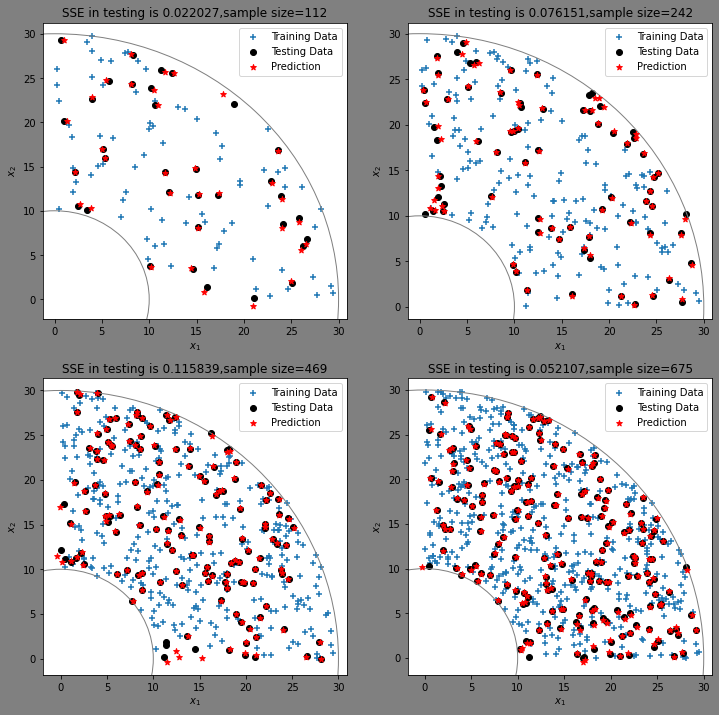

In [15]:
import neurolab as nl
from sklearn.model_selection import train_test_split
#第一個圓
x1, x2 = p1[:,0], p1[:,1]
center=np.array([0,0])
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
fig,ax=plt.subplots(2,2,figsize=(12,12))
ax[0,0].scatter(x_train, y_train, marker='+',  label = 'Training Data')
ax[0,0].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
ax[0,0].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
ax[0,0].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [20, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax[0,0].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
ax[0,0].set_title('SSE in testing is {:.6f},sample size={}'.format(sse_test,np.size(p1[:,0])))
ax[0,0].legend()
ax[0,0].set_xlabel('$x_1$')
ax[0,0].set_ylabel('$x_2$')
# ax[0,0].set_xlim(0, 30)
# ax[0,0].set_ylim(0, 30)
#第二個圓
x1, x2 = p2[:,0], p2[:,1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
ax[0,1].scatter(x_train, y_train, marker='+',  label = 'Training Data')
ax[0,1].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
ax[0,1].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
ax[0,1].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [20, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax[0,1].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
ax[0,1].set_title('SSE in testing is {:.6f},sample size={}'.format(sse_test,np.size(p2[:,0])))
ax[0,1].legend()
ax[0,1].set_xlabel('$x_1$')
ax[0,1].set_ylabel('$x_2$')
# ax[0,1].set_xlim(0, 30)
# ax[0,1].set_ylim(0, 30)
#第三個圓
x1, x2 = p3[:,0], p3[:,1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
ax[1,0].scatter(x_train, y_train, marker='+',  label = 'Training Data')
ax[1,0].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
ax[1,0].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
ax[1,0].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [20, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax[1,0].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
ax[1,0].set_title('SSE in testing is {:.6f},sample size={}'.format(sse_test,np.size(p3[:,0])))
ax[1,0].legend()
ax[1,0].set_xlabel('$x_1$')
ax[1,0].set_ylabel('$x_2$')
# ax[1,0].set_xlim(0, 30)
# ax[1,0].set_ylim(0, 30)
#第四個圓
x1, x2 = p4[:,0], p4[:,1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
ax[1,1].scatter(x_train, y_train, marker='+',  label = 'Training Data')
ax[1,1].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
ax[1,1].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
ax[1,1].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [20, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax[1,1].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
ax[1,1].set_title('SSE in testing is {:.6f},sample size={}'.format(sse_test,np.size(p4[:,0])))
ax[1,1].legend()
ax[1,1].set_xlabel('$x_1$')
ax[1,1].set_ylabel('$x_2$')
# ax[1,1].set_xlim(0, 30)
# ax[1,1].set_ylim(0, 30)
fig.set_facecolor("gray")
plt.savefig(air+'/hw6unidiffsample.pdf',format='pdf')
plt.show()



In [43]:
a=np.array([[1,2],[4,5]])
a[:,0]

array([1, 4])

Trainer(TrainBFGS)
Epoch: 100; Error: 0.020954502823068575;
The goal of learning is reached
Trainer(TrainBFGS)
Epoch: 100; Error: 0.08601910929357476;
Epoch: 200; Error: 0.019555638725100785;
Epoch: 300; Error: 0.01215872088994936;
The goal of learning is reached
Trainer(TrainBFGS)
Epoch: 100; Error: 0.14644751362033628;
Epoch: 200; Error: 0.07128796410883546;
Epoch: 300; Error: 0.055389601068691674;
Epoch: 400; Error: 0.04624329808058011;
Epoch: 500; Error: 0.03884723261632085;
Epoch: 600; Error: 0.03713004647197477;
Epoch: 700; Error: 0.03569997072444743;
Epoch: 800; Error: 0.035361999848870784;
Epoch: 900; Error: 0.03366456996557625;
Epoch: 1000; Error: 0.031631094450875696;
Epoch: 1100; Error: 0.029321854867339125;
Epoch: 1200; Error: 0.026973295987668677;
Epoch: 1300; Error: 0.025907218047264154;
Epoch: 1400; Error: 0.02483589340795316;
Epoch: 1500; Error: 0.024205788490776196;
Epoch: 1600; Error: 0.02357301712931674;
Epoch: 1700; Error: 0.02316744159827757;
Epoch: 1800; Error: 0.

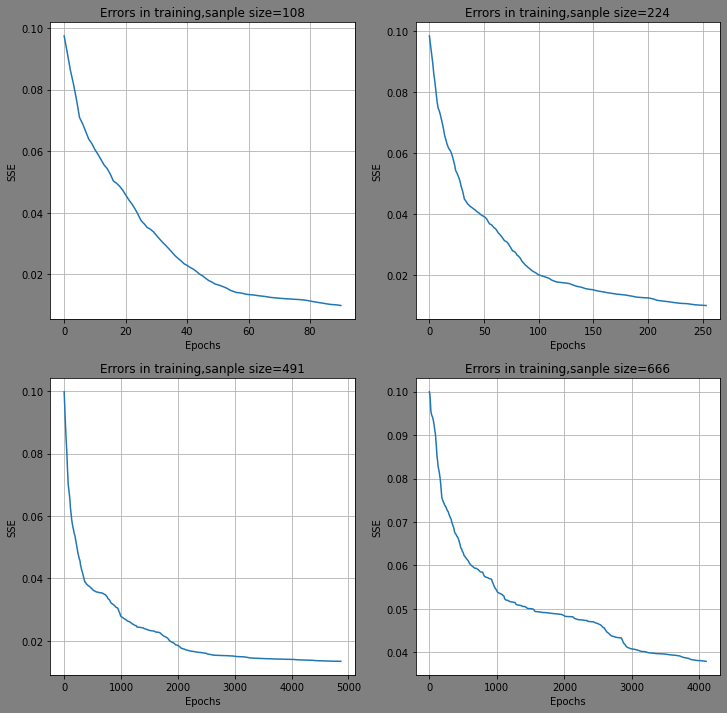

In [47]:
import neurolab as nl
from sklearn.model_selection import train_test_split
#第一個圓
x1, x2 = p1[:,0], p1[:,1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
fig,ax=plt.subplots(2,2,figsize=(12,12))
# ax[0,0].scatter(x_train, y_train, marker='+',  label = 'Training Data')
# ax[0,0].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
# ax[0,0].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
# ax[0,0].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [20, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
# ax[0,0].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
# ax[0,0].set_title('SSE in testing is {:.6f},sample size=105'.format(sse_test))
# ax[0,0].legend()
# ax[0,0].set_xlabel('$x_1$')
# ax[0,0].set_ylabel('$x_2$')
# ax[0,0].set_xlim(0, 30)
# ax[0,0].set_ylim(0, 30)
err = np.reshape(err, (-1, 1))
ax[0,0].plot(err[err < 0.1])
ax[0,0].set_xlabel('Epochs')
ax[0,0].set_ylabel('SSE')
ax[0,0].grid(True)
ax[0,0].set_title('Errors in training,sanple size={}'.format(np.size(p1[:,0])))
#第二個圓
x1, x2 = p2[:,0], p2[:,1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
# ax[0,1].scatter(x_train, y_train, marker='+',  label = 'Training Data')
# ax[0,1].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
# ax[0,1].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
# ax[0,1].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [20, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
# ax[0,1].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
# ax[0,1].set_title('SSE in testing is {:.6f},sample size=227'.format(sse_test))
# ax[0,1].legend()
# ax[0,1].set_xlabel('$x_1$')
# ax[0,1].set_ylabel('$x_2$')
# ax[0,1].set_xlim(0, 30)
# ax[0,1].set_ylim(0, 30)
err = np.reshape(err, (-1, 1))
ax[0,1].plot(err[err < 0.1])
ax[0,1].set_xlabel('Epochs')
ax[0,1].set_ylabel('SSE')
ax[0,1].grid(True)
ax[0,1].set_title('Errors in training,sanple size={}'.format(np.size(p2[:,0])))
#第三個圓
x1, x2 = p3[:,0], p3[:,1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
# ax[1,0].scatter(x_train, y_train, marker='+',  label = 'Training Data')
# ax[1,0].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
# ax[1,0].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
# ax[1,0].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [20, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
# ax[1,0].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
# ax[1,0].set_title('SSE in testing is {:.6f},sample size=434'.format(sse_test))
# ax[1,0].legend()
# ax[1,0].set_xlabel('$x_1$')
# ax[1,0].set_ylabel('$x_2$')
# ax[1,0].set_xlim(0, 30)
# ax[1,0].set_ylim(0, 30)
err = np.reshape(err, (-1, 1))
ax[1,0].plot(err[err < 0.1])
ax[1,0].set_xlabel('Epochs')
ax[1,0].set_ylabel('SSE')
ax[1,0].grid(True)
ax[1,0].set_title('Errors in training,sanple size={}'.format(np.size(p3[:,0])))
#第四個圓
x1, x2 = p4[:,0], p4[:,1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
# ax[1,1].scatter(x_train, y_train, marker='+',  label = 'Training Data')
# ax[1,1].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
# ax[1,1].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
# ax[1,1].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [20, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
# ax[1,1].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
# ax[1,1].set_title('SSE in testing is {:.6f},sample size=664'.format(sse_test))
# ax[1,1].legend()
# ax[1,1].set_xlabel('$x_1$')
# ax[1,1].set_ylabel('$x_2$')
# ax[1,1].set_xlim(0, 30)
# ax[1,1].set_ylim(0, 30)
err = np.reshape(err, (-1, 1))
ax[1,1].plot(err[err < 0.1])
ax[1,1].set_xlabel('Epochs')
ax[1,1].set_ylabel('SSE')
ax[1,1].grid(True)
ax[1,1].set_title('Errors in training,sanple size={}'.format(np.size(p4[:,0])))
fig.set_facecolor("gray")
plt.savefig('/Users/liang/Documents/統計數學與運算/images/hw6diffsampleeff.pdf',format='pdf')
plt.show()



不同神經元個數的準確結果

Trainer(TrainBFGS)
Epoch: 100; Error: 0.14948467821514183;
Epoch: 200; Error: 0.037226327965092426;
Epoch: 300; Error: 0.03054070488284167;
Epoch: 400; Error: 0.028711478429373865;
Epoch: 500; Error: 0.024474072091252328;
Epoch: 600; Error: 0.022990162533244145;
Epoch: 700; Error: 0.015929134783607857;
Epoch: 800; Error: 0.014407088377519764;
Epoch: 900; Error: 0.012994067282695514;
Epoch: 1000; Error: 0.0124185787963381;
Epoch: 1100; Error: 0.012034089878739999;
Epoch: 1200; Error: 0.011300637471444252;
Epoch: 1300; Error: 0.010239254088460582;
The goal of learning is reached
Trainer(TrainBFGS)
Epoch: 100; Error: 0.03500847527524963;
The goal of learning is reached
Trainer(TrainBFGS)
Epoch: 100; Error: 0.026358537261888682;
The goal of learning is reached
Trainer(TrainBFGS)
Epoch: 100; Error: 0.020252067527713264;
The goal of learning is reached


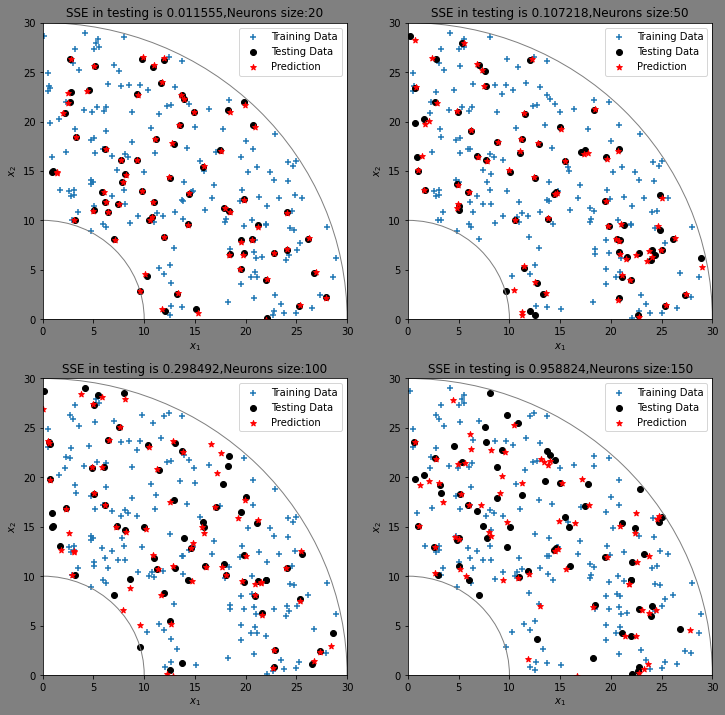

In [50]:
import neurolab as nl
from sklearn.model_selection import train_test_split
#第一個圓
x1, x2 = p2[:,0], p2[:,1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3,random_state=13)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
fig,ax=plt.subplots(2,2,figsize=(12,12))
ax[0,0].scatter(x_train, y_train, marker='+',  label = 'Training Data')
ax[0,0].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
ax[0,0].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
ax[0,0].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [20, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax[0,0].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
ax[0,0].set_title('SSE in testing is {:.6f},Neurons size:20'.format(sse_test))
ax[0,0].legend()
ax[0,0].set_xlabel('$x_1$')
ax[0,0].set_ylabel('$x_2$')
ax[0,0].set_xlim(0, 30)
ax[0,0].set_ylim(0, 30)
#第二個圓
x1, x2 = p2[:,0], p2[:,1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3,random_state=12)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
ax[0,1].scatter(x_train, y_train, marker='+',  label = 'Training Data')
ax[0,1].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
ax[0,1].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
ax[0,1].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [50, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax[0,1].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
ax[0,1].set_title('SSE in testing is {:.6f},Neurons size:50'.format(sse_test))
ax[0,1].legend()
ax[0,1].set_xlabel('$x_1$')
ax[0,1].set_ylabel('$x_2$')
ax[0,1].set_xlim(0, 30)
ax[0,1].set_ylim(0, 30)
#第三個圓
x1, x2 = p2[:,0], p2[:,1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3,random_state=11)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
ax[1,0].scatter(x_train, y_train, marker='+',  label = 'Training Data')
ax[1,0].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
ax[1,0].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
ax[1,0].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [100, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax[1,0].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
ax[1,0].set_title('SSE in testing is {:.6f},Neurons size:100'.format(sse_test))
ax[1,0].legend()
ax[1,0].set_xlabel('$x_1$')
ax[1,0].set_ylabel('$x_2$')
ax[1,0].set_xlim(0, 30)
ax[1,0].set_ylim(0, 30)
#第四個圓
x1, x2 = p2[:,0], p2[:,1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3,random_state=10)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
ax[1,1].scatter(x_train, y_train, marker='+',  label = 'Training Data')
ax[1,1].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
ax[1,1].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
ax[1,1].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [150, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax[1,1].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
ax[1,1].set_title('SSE in testing is {:.6f},Neurons size:150'.format(sse_test))
ax[1,1].legend()
ax[1,1].set_xlabel('$x_1$')
ax[1,1].set_ylabel('$x_2$')
ax[1,1].set_xlim(0, 30)
ax[1,1].set_ylim(0, 30)
fig.set_facecolor("gray")
plt.savefig('/Users/liang/Documents/統計數學與運算/images/hw6diffneurons.pdf',format='pdf')
plt.show()


Trainer(TrainBFGS)
Epoch: 100; Error: 0.06798710341823716;
Epoch: 200; Error: 0.020377847576237285;
Epoch: 300; Error: 0.014048157641466375;
Epoch: 400; Error: 0.01119151437566734;
The goal of learning is reached
Trainer(TrainBFGS)
Epoch: 100; Error: 0.027747937401282625;
The goal of learning is reached
Trainer(TrainBFGS)
Epoch: 100; Error: 0.01769975211846919;
The goal of learning is reached
Trainer(TrainBFGS)
Epoch: 100; Error: 0.019743012829554984;
The goal of learning is reached


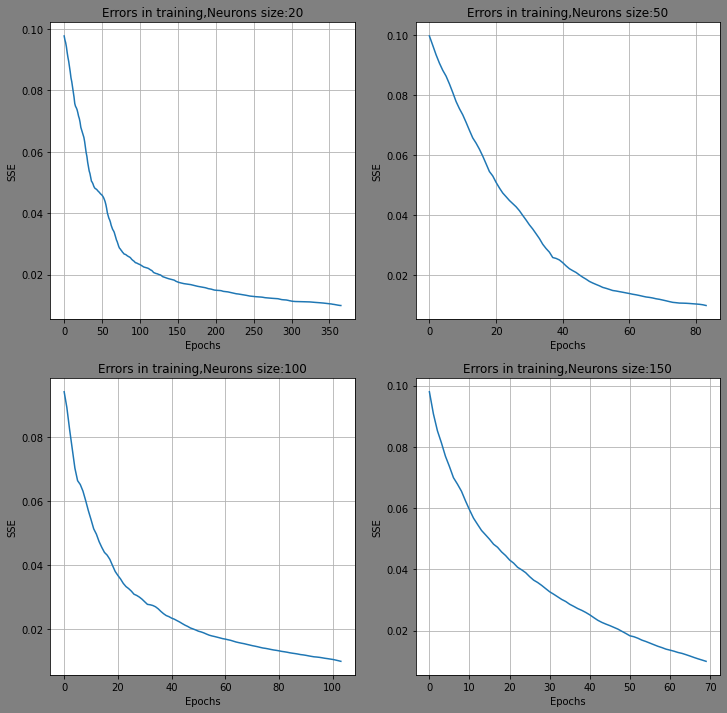

In [52]:
import neurolab as nl
from sklearn.model_selection import train_test_split
#第一個圓
x1, x2 = p2[:,0], p2[:,1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3,random_state=13)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
fig,ax=plt.subplots(2,2,figsize=(12,12))
# fig = plt.figure(figsize=(6,6))
# ax = fig.gca()
# ax[0,0].scatter(x_train, y_train, marker='+',  label = 'Training Data')
# ax[0,0].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
# ax[0,0].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
# ax[0,0].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [20, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
# ax[0,0].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
# ax[0,0].set_title('SSE in testing is {:.6f},Neural size:20'.format(sse_test))
# ax[0,0].legend()
# ax[0,0].set_xlabel('$x_1$')
# ax[0,0].set_ylabel('$x_2$')
# ax[0,0].set_xlim(0, 30)
# ax[0,0].set_ylim(0, 30)
err = np.reshape(err, (-1, 1))
ax[0,0].plot(err[err < 0.1])
ax[0,0].set_xlabel('Epochs')
ax[0,0].set_ylabel('SSE')
ax[0,0].grid(True)
ax[0,0].set_title('Errors in training,Neurons size:20')
#第二個圓
x1, x2 = p2[:,0], p2[:,1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3,random_state=12)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
# ax[0,1].scatter(x_train, y_train, marker='+',  label = 'Training Data')
# ax[0,1].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
# ax[0,1].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
# ax[0,1].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [50, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
# ax[0,1].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
# ax[0,1].set_title('SSE in testing is {:.6f},Neural size:50'.format(sse_test))
# ax[0,1].legend()
# ax[0,1].set_xlabel('$x_1$')
# ax[0,1].set_ylabel('$x_2$')
# ax[0,1].set_xlim(0, 30)
# ax[0,1].set_ylim(0, 30)
err = np.reshape(err, (-1, 1))
ax[0,1].plot(err[err < 0.1])
ax[0,1].set_xlabel('Epochs')
ax[0,1].set_ylabel('SSE')
ax[0,1].grid(True)
ax[0,1].set_title('Errors in training,Neurons size:50')
#第三個圓
x1, x2 = p2[:,0], p2[:,1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3,random_state=11)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
# ax[1,0].scatter(x_train, y_train, marker='+',  label = 'Training Data')
# ax[1,0].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
# ax[1,0].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
# ax[1,0].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [100, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
# ax[1,0].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
# ax[1,0].set_title('SSE in testing is {:.6f},Neural size:100'.format(sse_test))
# ax[1,0].legend()
# ax[1,0].set_xlabel('$x_1$')
# ax[1,0].set_ylabel('$x_2$')
# ax[1,0].set_xlim(0, 30)
# ax[1,0].set_ylim(0, 30)
err = np.reshape(err, (-1, 1))
ax[1,0].plot(err[err < 0.1])
ax[1,0].set_xlabel('Epochs')
ax[1,0].set_ylabel('SSE')
ax[1,0].grid(True)
ax[1,0].set_title('Errors in training,Neurons size:100')
#第四個圓
x1, x2 = p2[:,0], p2[:,1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3,random_state=10)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
# ax[1,1].scatter(x_train, y_train, marker='+',  label = 'Training Data')
# ax[1,1].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
# ax[1,1].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
# ax[1,1].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [150, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
# ax[1,1].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
# ax[1,1].set_title('SSE in testing is {:.6f},Neural size:150'.format(sse_test))
# ax[1,1].legend()
# ax[1,1].set_xlabel('$x_1$')
# ax[1,1].set_ylabel('$x_2$')
# ax[1,1].set_xlim(0, 30)
# ax[1,1].set_ylim(0, 30)
err = np.reshape(err, (-1, 1))
ax[1,1].plot(err[err < 0.1])
ax[1,1].set_xlabel('Epochs')
ax[1,1].set_ylabel('SSE')
ax[1,1].grid(True)
ax[1,1].set_title('Errors in training,Neurons size:150')
fig.set_facecolor("gray")
plt.savefig('/Users/liang/Documents/統計數學與運算/images/hw6diffneuroseff.pdf',format='pdf')
plt.show()


# 圖形辨識 #

In [7]:
from sklearn.datasets import fetch_openml
from scipy.io import loadmat
import numpy as np
X,y=fetch_openml('mnist_784',return_X_y=True)#y:每張圖的數字總共有70000張
def montage(A,m,n):   
    sz=np.sqrt(X.shape[1]).astype('int')
    M=np.zeros((m*sz,n*sz))
    for i in range(m):
        for j in range(n):
            M[i*sz:(i+1)*sz,j*sz:(j+1)*sz]=\
                A[i*n+j,:].reshape(sz,sz)

    return M

### 從網路上下載資料集 ###

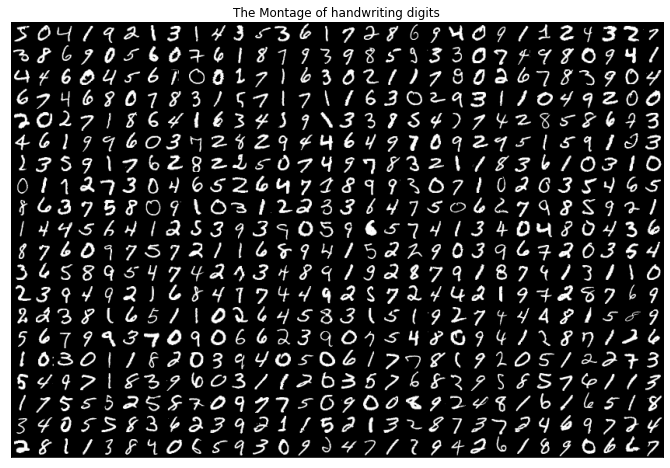

In [9]:
import matplotlib.pyplot as plt
import numpy as np
m,n=20,30
M=montage(np.array(X)[:m*n,:],m,n)#X有七萬列（七萬個數字），但是只想要取前20*30個數字來用
plt.figure(figsize=(12,8))
plt.imshow(M,cmap= 'gray')
# plt.imshow(M,cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])
plt.title('The Montage of handwriting digits')
plt.savefig(air+'/hw6montage.pdf',format='pdf')
plt.show()

不同演算法

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay

#prepare data
N=2000 #sample size取兩千個樣本出來做分類
X_=np.array(X)[:N,:]#因為X是dataframe故要轉換成array
y_=np.array(y)[:N]
#setup and run ANN
hidden_layers=(30,)#one hidden layer
X_train, X_test, y_train, y_test = \
    train_test_split(X_/255, y_, test_size = 0.25)#除以255是為了讓數字標準化
# solver = 'sgd' # not efficient, need more tuning # solver = ’lbfgs’ # not suitable here
# solver = 'adam' # default solver
#開始訓練資料
clf1=MLPClassifier(max_iter=10000,solver='sgd',hidden_layer_sizes=hidden_layers,verbose=False,activation='logistic',tol=1e-6,random_state=0)
clf2=MLPClassifier(max_iter=10000,solver='adam',hidden_layer_sizes=hidden_layers,verbose=False,activation='logistic',tol=1e-6,random_state=0)
clf3=MLPClassifier(max_iter=10000,solver='lbfgs',hidden_layer_sizes=hidden_layers,verbose=False,activation='logistic',tol=1e-6,random_state=0)
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)
print("accuracy by score for tested data:{:.2f}%".format(100*clf1.score(X_test,y_test)))
print("accuracy by score for tested data:{:.2f}%".format(100*clf2.score(X_test,y_test)))
print("accuracy by score for tested data:{:.2f}%".format(100*clf3.score(X_test,y_test)))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy by score for tested data:90.40%
accuracy by score for tested data:88.40%
accuracy by score for tested data:90.40%


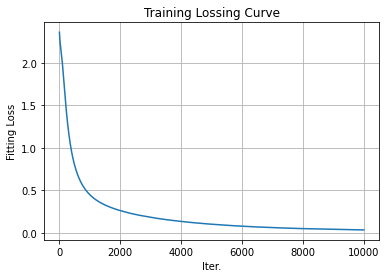

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.plot(clf1.loss_curve_)
plt.grid(True)
plt.title('Training Lossing Curve')
plt.xlabel('Iter.')
plt.ylabel('Fitting Loss')
plt.show()

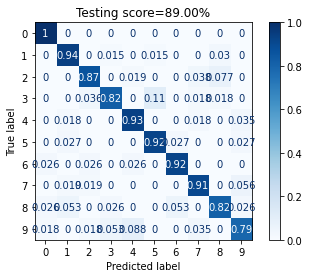

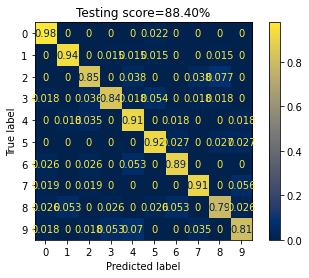

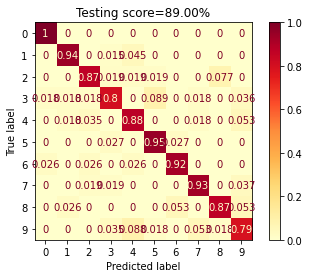

In [100]:
from sklearn.metrics import ConfusionMatrixDisplay
#測試資料結果
title1='Testing score={:.2f}%'.format(100*clf1.score(X_test,y_test))
disp=ConfusionMatrixDisplay.from_estimator(
clf1,
X_test,
y_test,
cmap=plt.cm.Blues,
normalize='true',)
disp.ax_.set_title(title1)
plt.show()
title2='Testing score={:.2f}%'.format(100*clf2.score(X_test,y_test))
disp=ConfusionMatrixDisplay.from_estimator(
clf2,
X_test,
y_test,
cmap=plt.cm.cividis,
normalize='true',)
disp.ax_.set_title(title2)
plt.show()
title3='Testing score={:.2f}%'.format(100*clf3.score(X_test,y_test))
disp=ConfusionMatrixDisplay.from_estimator(
clf3,
X_test,
y_test,
cmap=plt.cm.YlOrRd,
normalize='true',)
disp.ax_.set_title(title3)
plt.show()

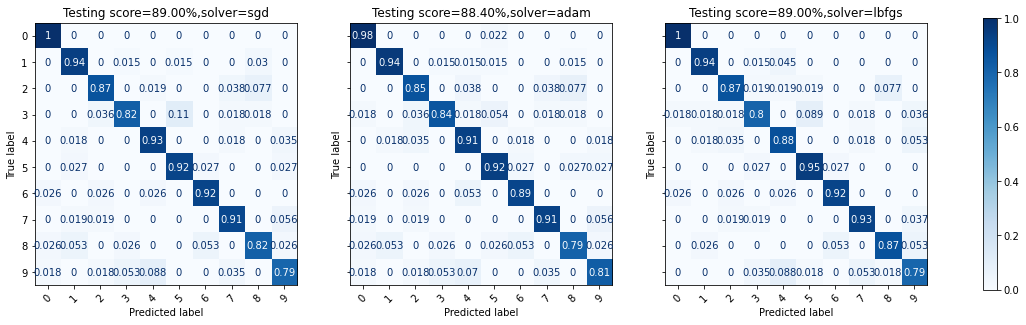

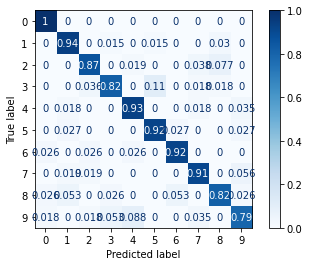

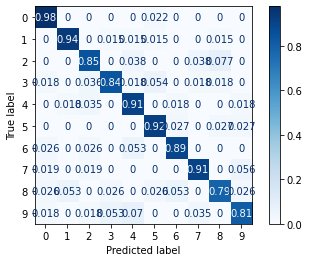

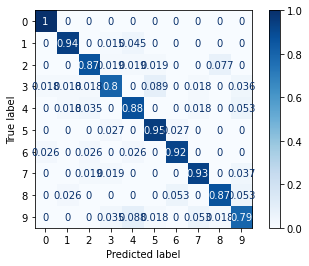

In [102]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# classifiers = {
#     "Naive Bayes": GaussianNB(),
#     "LogisiticRegression": LogisticRegression(),
#     "KNearest": KNeighborsClassifier(),
#     "Support Vector Classifier": SVC(),
#     "DecisionTreeClassifier": DecisionTreeClassifier(),
# }
key=['Testing score={:.2f}%,solver=sgd'.format(100*clf1.score(X_test,y_test)),'Testing score={:.2f}%,solver=adam'.format(100*clf2.score(X_test,y_test)),'Testing score={:.2f}%,solver=lbfgs'.format(100*clf3.score(X_test,y_test))]
f, axes = plt.subplots(1, 3, figsize=(20, 5), sharey='row')
clf=[clf1,clf2,clf3]
for i in np.arange(3):
    # y_pred = classifier.fit(X_train, y_train).predict(X_test)
    # cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay.from_estimator(
    clf[i],
    X_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize='true',)
    disp.plot(ax=axes[i], xticks_rotation=45,cmap=plt.cm.Blues)
    disp.ax_.set_title(key[i])
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('Predicted label')
    # if i!=0:
    #     disp.ax_.set_ylabel('')

# f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
# plt.savefig(air+'/hw6montagediffslover.pdf',format='pdf')
plt.show()

不同神經元個數

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
#prepare data
N=500 #sample size取兩千個樣本出來做分類
X_=np.array(X)[:N,:]#因為X是dataframe故要轉換成array
y_=np.array(y)[:N]
#setup and run ANN
hidden_layers=(30,)#one hidden layer
X_train, X_test, y_train, y_test = \
    train_test_split(X_/255, y_, test_size = 0.25)#除以255是為了讓數字標準化
# solver = 'sgd' # not efficient, need more tuning # solver = ’lbfgs’ # not suitable here
# solver = 'adam' # default solver
#開始訓練資料
clf1=MLPClassifier(max_iter=10000,solver='adam',hidden_layer_sizes=(30,),verbose=False,activation='logistic',tol=1e-6,random_state=0)
clf2=MLPClassifier(max_iter=10000,solver='adam',hidden_layer_sizes=(60,),verbose=False,activation='logistic',tol=1e-6,random_state=0)
clf3=MLPClassifier(max_iter=10000,solver='adam',hidden_layer_sizes=(100,),verbose=False,activation='logistic',tol=1e-6,random_state=0)
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)
print("accuracy by score for tested data:{:.2f}%".format(100*clf1.score(X_test,y_test)))
print("accuracy by score for tested data:{:.2f}%".format(100*clf2.score(X_test,y_test)))
print("accuracy by score for tested data:{:.2f}%".format(100*clf3.score(X_test,y_test)))

accuracy by score for tested data:81.60%
accuracy by score for tested data:82.40%
accuracy by score for tested data:80.80%


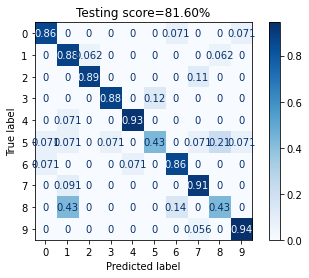

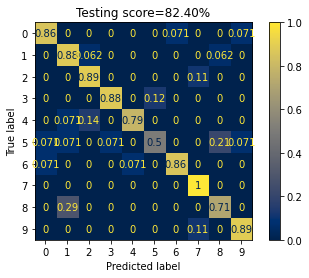

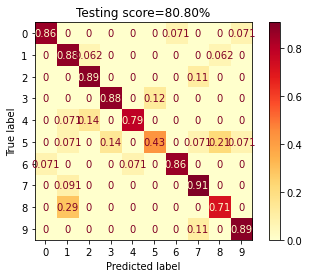

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay
#測試資料結果
title1='Testing score={:.2f}%'.format(100*clf1.score(X_test,y_test))
disp=ConfusionMatrixDisplay.from_estimator(
clf1,
X_test,
y_test,
cmap=plt.cm.Blues,
normalize='true',)
disp.ax_.set_title(title1)
plt.show()
title2='Testing score={:.2f}%'.format(100*clf2.score(X_test,y_test))
disp=ConfusionMatrixDisplay.from_estimator(
clf2,
X_test,
y_test,
cmap=plt.cm.cividis,
normalize='true',)
disp.ax_.set_title(title2)
plt.show()
title3='Testing score={:.2f}%'.format(100*clf3.score(X_test,y_test))
disp=ConfusionMatrixDisplay.from_estimator(
clf3,
X_test,
y_test,
cmap=plt.cm.YlOrRd,
normalize='true',)
disp.ax_.set_title(title3)
# plt.savefig(air+'/hw6montagediffneurons.pdf',format='pdf')
plt.show()

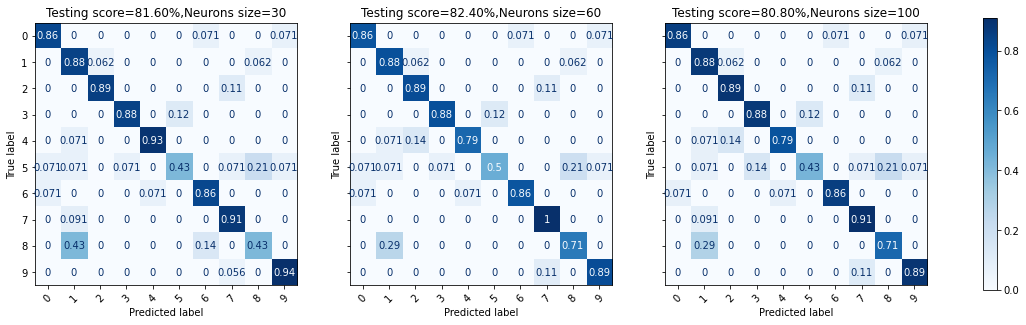

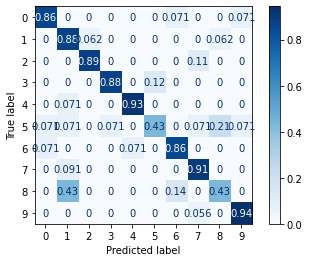

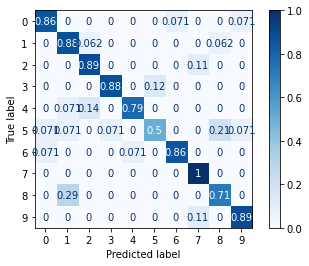

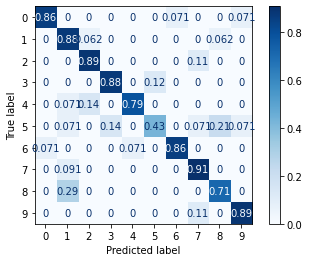

In [98]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# classifiers = {
#     "Naive Bayes": GaussianNB(),
#     "LogisiticRegression": LogisticRegression(),
#     "KNearest": KNeighborsClassifier(),
#     "Support Vector Classifier": SVC(),
#     "DecisionTreeClassifier": DecisionTreeClassifier(),
# }
key=['Testing score={:.2f}%,Neurons size=30'.format(100*clf1.score(X_test,y_test)),'Testing score={:.2f}%,Neurons size=60'.format(100*clf2.score(X_test,y_test)),'Testing score={:.2f}%,Neurons size=100'.format(100*clf3.score(X_test,y_test))]
f, axes = plt.subplots(1, 3, figsize=(20, 5), sharey='row')
clf=[clf1,clf2,clf3]
for i in np.arange(3):
    # y_pred = classifier.fit(X_train, y_train).predict(X_test)
    # cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay.from_estimator(
    clf[i],
    X_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize='true',)
    disp.plot(ax=axes[i], xticks_rotation=45,cmap=plt.cm.Blues)
    disp.ax_.set_title(key[i])
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('Predicted label')
    # if i!=0:
    #     disp.ax_.set_ylabel('')

# f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.savefig(air+'/hw6montagediffneurons.pdf',format='pdf')
plt.show()

### 字母 ###

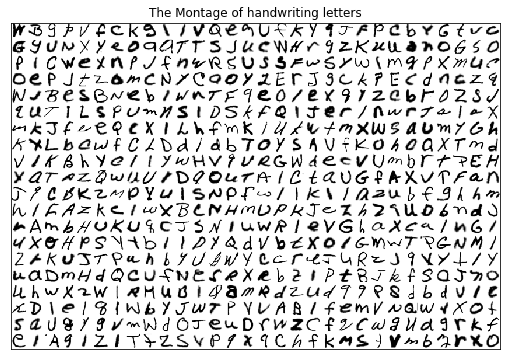

In [17]:
from scipy.io import loadmat
from sklearn.datasets import fetch_openml
# data_dir = '../Data/'
# X,y=fetch_openml('mnist_748,return_X_y')
D = loadmat('/Users/liang/Downloads/Letters_train.mat') 
# D.keys()
X = D['X'] # images
y = D['y'] # labels: single output in 0~9
plt.figure(figsize = (9,6))
# prepare and diaplay a montage of digit images n,m=20,30 #Anxmmontage(totalmnimages)
n,m=20,30
sz = np.sqrt(X.shape[1]).astype('int') # image size sz x sz M = np.zeros((m*sz, n*sz)) # montage image
M=np.zeros((m*sz,n*sz))
A = np.array(X)[:m*n,:] # show the first nm images
# Arrange images to form a montage
for i in range(m) :
    for j in range(n) :
        M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = \
            A[i*n+j,:].reshape(sz, sz)

plt.imshow(M.T, cmap = plt.cm.gray_r, \
        interpolation = 'nearest')
plt.xticks([])
plt.yticks([])
plt.title('The Montage of handwriting letters')
plt.savefig(air+'/hw6montageletters.pdf',format='pdf')
plt.show()

不同的激發函數

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
# prepare data
X_train, X_test, y_train, y_test = \
    train_test_split(X, y.ravel(), test_size = 0.25)#除以255是為了讓數字標準化
# setup and run
hidden_layers = (30,) # one hidden layer
# solver = ’sgd’ # not efficient, need more tuning # solver = ’lbfgs’ # not suitable here
solver = 'adam' # default solver
clf1 = MLPClassifier(max_iter = 10000, solver = solver,hidden_layer_sizes = hidden_layers, verbose = False, activation = 'logistic', tol = 1e-6, random_state = 0) 
clf2 = MLPClassifier(max_iter = 10000, solver = solver,hidden_layer_sizes = hidden_layers, verbose = False, activation = 'relu', tol = 1e-6, random_state = 0) 
clf3 = MLPClassifier(max_iter = 10000, solver = solver,hidden_layer_sizes = hidden_layers, verbose = False, activation = 'tanh', tol = 1e-6, random_state = 0) 
clf4 = MLPClassifier(max_iter = 10000, solver = solver,hidden_layer_sizes = hidden_layers, verbose = False, activation = 'identity', tol = 1e-6, random_state = 0) 
clf1.fit(X_train, y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)
clf4.fit(X_train,y_train)
print("accuracy by score for tested data:{:.2f}%".format(100*clf1.score(X_test,y_test)))
print("accuracy by score for tested data:{:.2f}%".format(100*clf2.score(X_test,y_test)))
print("accuracy by score for tested data:{:.2f}%".format(100*clf3.score(X_test,y_test)))
print("accuracy by score for tested data:{:.2f}%".format(100*clf4.score(X_test,y_test)))
# y_test_hat = clf1.predict(X_test)

accuracy by score for tested data:64.48%
accuracy by score for tested data:31.00%
accuracy by score for tested data:61.20%
accuracy by score for tested data:56.44%


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


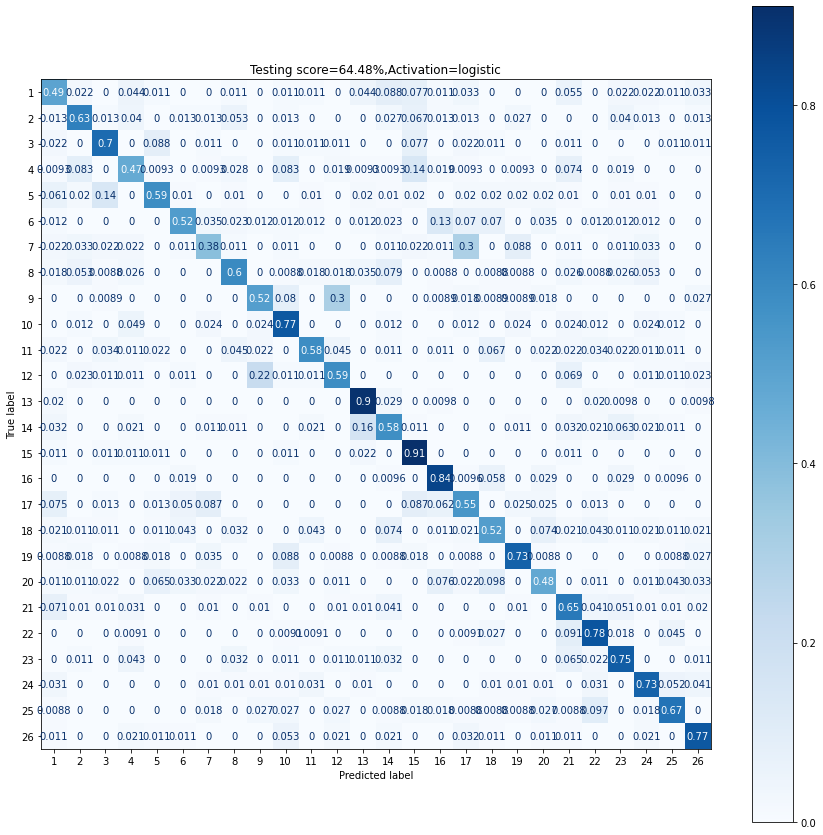

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


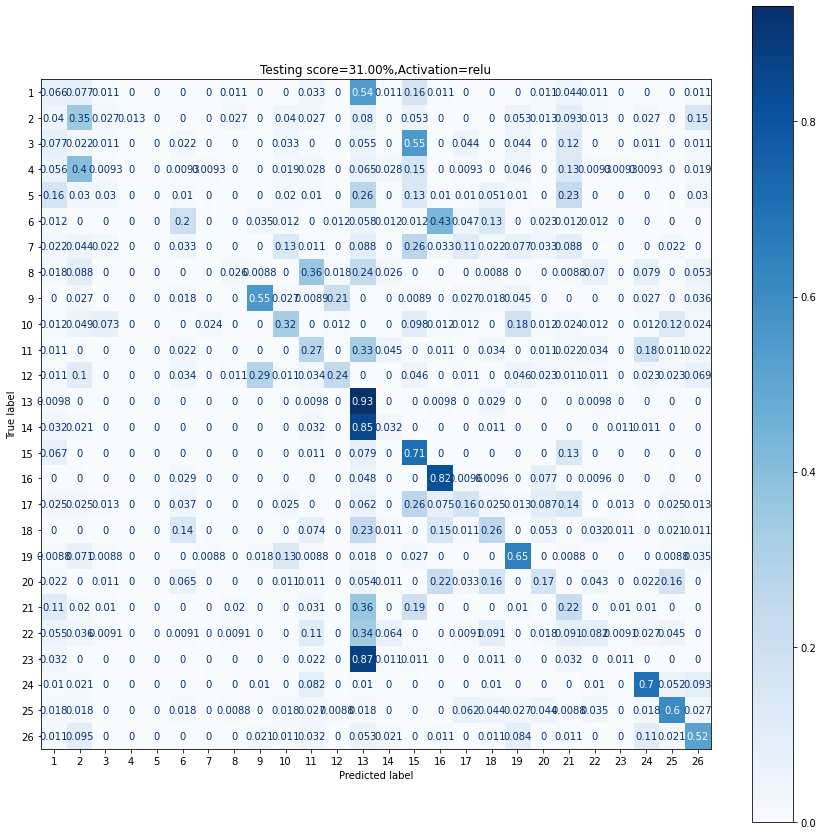

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


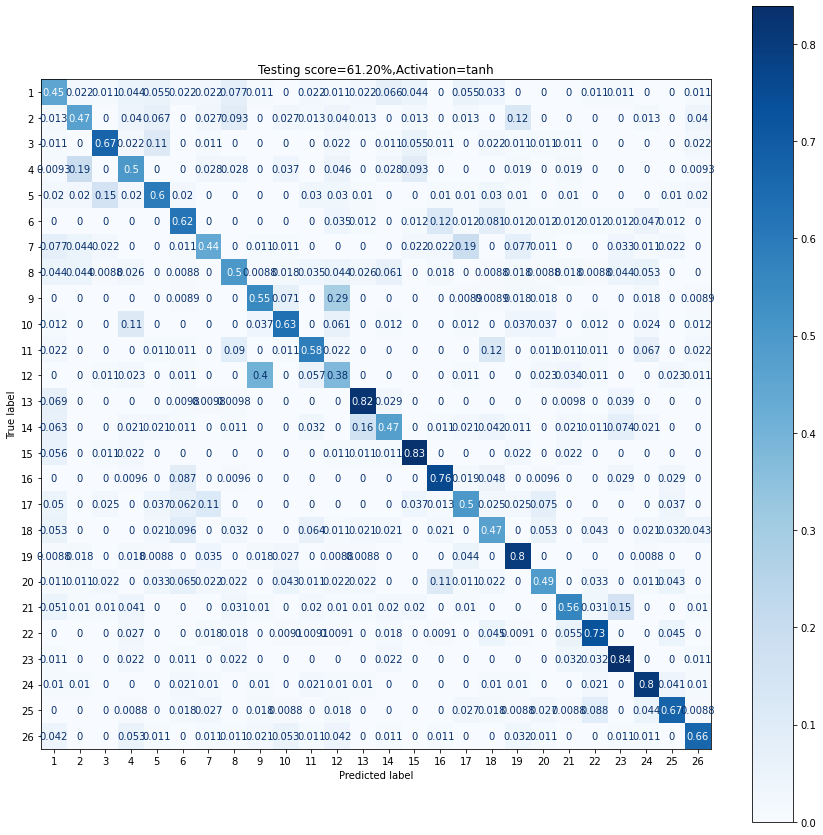

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


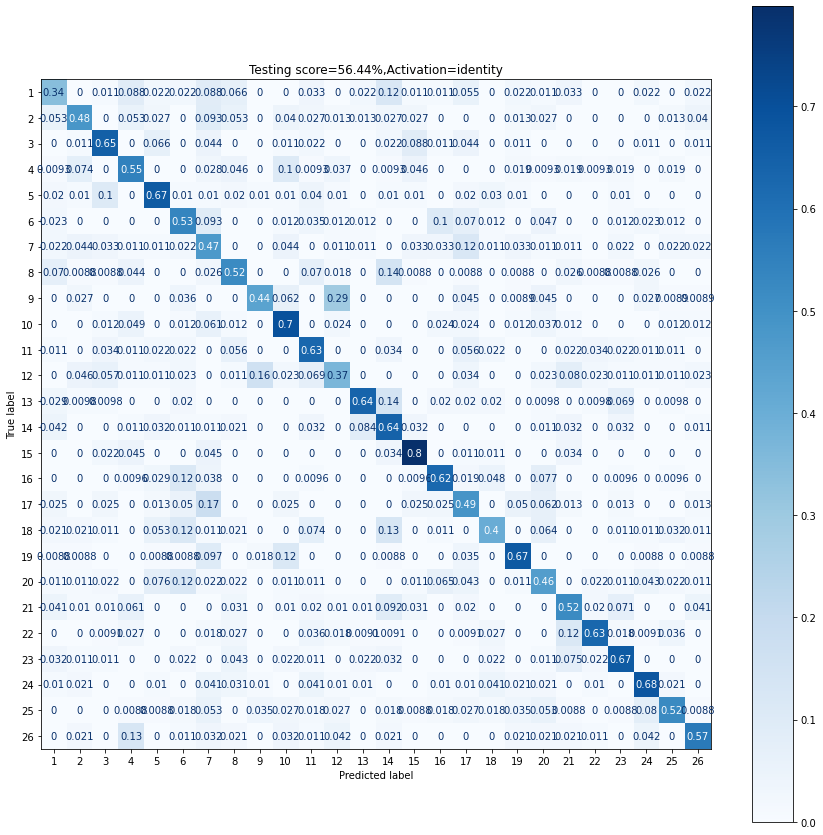

In [106]:
from sklearn.metrics import plot_confusion_matrix
score = clf1.score(X_test, y_test)
fig, ax = plt.subplots(figsize=(15, 15))
# Confusion matrix
disp1=plot_confusion_matrix(clf1, X_test, y_test,
    cmap = plt.cm.Blues, normalize = 'true',ax=ax)
disp1.ax_.set_title('Testing score={:.2f}%,Activation=logistic'.format(100*clf1.score(X_test,y_test)))
plt.show()
score = clf2.score(X_test, y_test)
fig, ax = plt.subplots(figsize=(15, 15))
# Confusion matrix
disp2=plot_confusion_matrix(clf2, X_test, y_test,
    cmap = plt.cm.Blues, normalize = 'true',ax=ax)
disp2.ax_.set_title('Testing score={:.2f}%,Activation=relu'.format(100*clf2.score(X_test,y_test)))
plt.show()
score = clf3.score(X_test, y_test)
fig, ax = plt.subplots(figsize=(15, 15))
# Confusion matrix
disp3=plot_confusion_matrix(clf3, X_test, y_test,cmap = plt.cm.Blues, normalize = 'true',ax=ax)
disp3.ax_.set_title('Testing score={:.2f}%,Activation=tanh'.format(100*clf3.score(X_test,y_test)))
plt.show()
score = clf4.score(X_test, y_test)
fig, ax = plt.subplots(figsize=(15, 15))
# Confusion matrix
disp4=plot_confusion_matrix(clf4, X_test, y_test,cmap = plt.cm.Blues, normalize = 'true',ax=ax)
disp4.ax_.set_title('Testing score={:.2f}%,Activation=identity'.format(100*clf4.score(X_test,y_test)))
# plt.savefig(air+'/hw6diffactivation.pdf',format='pdf')
plt.show()